In [66]:
# Jupyer Notebook Theme: jt -t monokai -f fira -fs 10 -nf ptsans -nfs 11 -N -kl -cursw 2 -cursc r -cellw 95% -T
# Check python version
import sys
cdPyVer = 0x600
cdSysVer = sys.version[:5]
print("%s%s" %("My python version is: ", cdSysVer)) # strangely it works only on 3.7.4 and not 3.7.6

# Import libraries
import pandas as pd 
import numpy as np
import warnings

# Progress Bar
from tqdm.auto import tqdm

# Visualisation Libraries
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
plt.style.use('seaborn-dark') # use this theme as you are using dark theme in the notebook
import seaborn as sns
import folium
from folium.plugins import HeatMap, FastMarkerCluster

# Utility Modules
# Utility Modules
import os
os.chdir('/Users/shandeep/data_science/')
from utils import qa
from utils import utils
from utils import viz_utils


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
              
warnings.filterwarnings('ignore')

My python version is: 3.9.7


'/Users/shandeep/data_science/other_projects/datasets/bolt'

In [67]:
cd /Users/shandeep/data_science/other_projects/datasets/bolt

/Users/shandeep/data_science/other_projects/datasets/bolt


In [68]:
ls

demand.csv           supply.csv           task2.xlsx
pricing_analyst.csv  task1.xlsx


In [69]:
df = pd.read_csv('../bolt/pricing_analyst.csv')

In [70]:
df.head()

,Created Date,Country,City,Restaurant ID,Restaurant Name,Order State,Cancel Reason,Cuisine,Platform,Payment Method,Card Issuer,Products in Order,Order Value € (Gross),Delivery Fee,Delivery Time
0,28.02.2020,Portugal,Lisbon,7238,Chirashi - Alvalade,delivered,NaN,Sushi,ios,cashless,BANKINTER S.A.,13,€89.30,0.0,17.7
1,28.02.2020,Portugal,Lisbon,12758,Istanbul Kebab Pizza - Alameda,delivered,NaN,Pizza,android,cashless,BANCO COMERCIAL PORTUGUES S.A.,1,€10.00,0.0,16.3
2,28.02.2020,Portugal,Lisbon,6631,A-100 - Lisboa,delivered,NaN,Burgers,ios,cashless,BANCO COMERCIAL PORTUGUES S.A.,2,€16.96,0.0,13.6
3,28.02.2020,Portugal,Lisbon,10535,La Paparrucha - Parrilla Argentina,delivered,NaN,South American,ios,cashless,ING BANK N.V.,3,€25.15,4.2,26.1
4,28.02.2020,Portugal,Lisbon,9695,Choupana Caffe,delivered,NaN,Brunch,ios,cashless,INTESA SANPAOLO SPA,3,€16.00,0.0,11.6


### Data Cleaning

In [71]:
# Column Names: Lower case and Remove spaces

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','')

# Components of a data frame 

print(df.columns)

# Index of data frame

print()
print(df.index)

Index(['createddate', 'country', 'city', 'restaurantid', 'restaurantname',
       'orderstate', 'cancelreason', 'cuisine', 'platform', 'paymentmethod',
       'cardissuer', 'productsinorder', 'ordervalue€(gross)', 'deliveryfee',
       'deliverytime'],
      dtype='object')

RangeIndex(start=0, stop=99618, step=1)


In [72]:
df['date'] = pd.to_datetime(df['createddate'],format='%d.%m.%Y')

In [73]:
# Renaming Columns

new_columns_dict = {'ordervalue€(gross)': 'ordervaluegross'}
df.rename(columns = new_columns_dict, inplace=True)

In [74]:

df['date_year'] = df['date'].apply(lambda x: x.year)
df['date_month'] = df['date'].apply(lambda x: x.month)
df['date_month_name'] = df['date'].apply(lambda x: x.strftime('%b'))
df['date_year_month'] = df['date'].apply(lambda x: x.strftime('%Y%m'))


## Make columns small
df.columns = df.columns.str.replace(' ','_')
df.columns = [x.lower() for x in df.columns]

# Drop first column 'date'
df = df.iloc[: , 1:]

In [75]:
df['date_day'] = df['date'].apply(lambda x: x.day)
df['date_dayofweek'] = df['date'].apply(lambda x: x.dayofweek)
df['date_dayofweek_name'] = df['date'].apply(lambda x: x.strftime('%a'))

In [76]:
df.head()

,country,city,restaurantid,restaurantname,orderstate,cancelreason,cuisine,platform,paymentmethod,cardissuer,productsinorder,ordervaluegross,deliveryfee,deliverytime,date,date_year,date_month,date_month_name,date_year_month,date_day,date_dayofweek,date_dayofweek_name
0,Portugal,Lisbon,7238,Chirashi - Alvalade,delivered,NaN,Sushi,ios,cashless,BANKINTER S.A.,13,€89.30,0.0,17.7,2020-02-28,2020,2,Feb,202002,28,4,Fri
1,Portugal,Lisbon,12758,Istanbul Kebab Pizza - Alameda,delivered,NaN,Pizza,android,cashless,BANCO COMERCIAL PORTUGUES S.A.,1,€10.00,0.0,16.3,2020-02-28,2020,2,Feb,202002,28,4,Fri
2,Portugal,Lisbon,6631,A-100 - Lisboa,delivered,NaN,Burgers,ios,cashless,BANCO COMERCIAL PORTUGUES S.A.,2,€16.96,0.0,13.6,2020-02-28,2020,2,Feb,202002,28,4,Fri
3,Portugal,Lisbon,10535,La Paparrucha - Parrilla Argentina,delivered,NaN,South American,ios,cashless,ING BANK N.V.,3,€25.15,4.2,26.1,2020-02-28,2020,2,Feb,202002,28,4,Fri
4,Portugal,Lisbon,9695,Choupana Caffe,delivered,NaN,Brunch,ios,cashless,INTESA SANPAOLO SPA,3,€16.00,0.0,11.6,2020-02-28,2020,2,Feb,202002,28,4,Fri


In [77]:
# Summarising dates

print(df['date'].min())
print(df['date'].max())

2020-01-01 00:00:00
2020-02-28 00:00:00


### Null Values

In [78]:
# Look for the number of missing data in each column
nulldf = pd.DataFrame(df.isnull().sum(), columns = ['Number_of_Null_Values'])
nulldf = nulldf[nulldf['Number_of_Null_Values'] != 0]

# Number of columns with nulll values
print('Number of columns with null values: ', len(nulldf))

nulldf.sort_values(by=['Number_of_Null_Values'], ascending = False)

Number of columns with null values:  7


,Number_of_Null_Values
cancelreason,97936
cardissuer,12712
platform,11934
ordervaluegross,1682
deliveryfee,1682
deliverytime,1682
cuisine,327


In [79]:
# Change data type so that can add to delivery fee for GMV metric!
df['ordervaluegross'] = df['ordervaluegross'].str.replace(',','').str.replace('€','').astype('float')

In [80]:
df.dtypes

country                        object
city                           object
restaurantid                    int64
restaurantname                 object
orderstate                     object
cancelreason                   object
cuisine                        object
platform                       object
paymentmethod                  object
cardissuer                     object
productsinorder                 int64
ordervaluegross               float64
deliveryfee                   float64
deliverytime                  float64
date                   datetime64[ns]
date_year                       int64
date_month                      int64
date_month_name                object
date_year_month                object
date_day                        int64
date_dayofweek                  int64
date_dayofweek_name            object
dtype: object

In [81]:
## New Metric (GMV)
df['gmv'] =df['ordervaluegross'] + df['deliveryfee']

In [82]:
df.head()

,country,city,restaurantid,restaurantname,orderstate,cancelreason,cuisine,platform,paymentmethod,cardissuer,productsinorder,ordervaluegross,deliveryfee,deliverytime,date,date_year,date_month,date_month_name,date_year_month,date_day,date_dayofweek,date_dayofweek_name,gmv
0,Portugal,Lisbon,7238,Chirashi - Alvalade,delivered,NaN,Sushi,ios,cashless,BANKINTER S.A.,13,89.30,0.0,17.7,2020-02-28,2020,2,Feb,202002,28,4,Fri,89.30
1,Portugal,Lisbon,12758,Istanbul Kebab Pizza - Alameda,delivered,NaN,Pizza,android,cashless,BANCO COMERCIAL PORTUGUES S.A.,1,10.00,0.0,16.3,2020-02-28,2020,2,Feb,202002,28,4,Fri,10.00
2,Portugal,Lisbon,6631,A-100 - Lisboa,delivered,NaN,Burgers,ios,cashless,BANCO COMERCIAL PORTUGUES S.A.,2,16.96,0.0,13.6,2020-02-28,2020,2,Feb,202002,28,4,Fri,16.96
3,Portugal,Lisbon,10535,La Paparrucha - Parrilla Argentina,delivered,NaN,South American,ios,cashless,ING BANK N.V.,3,25.15,4.2,26.1,2020-02-28,2020,2,Feb,202002,28,4,Fri,29.35
4,Portugal,Lisbon,9695,Choupana Caffe,delivered,NaN,Brunch,ios,cashless,INTESA SANPAOLO SPA,3,16.00,0.0,11.6,2020-02-28,2020,2,Feb,202002,28,4,Fri,16.00


### Column Types

In [83]:
# Column Types

# Columns with numerical data
numerical_columns = df._get_numeric_data().columns

# Number of numerical columns
print('Number of columns with numerical data: ', len(numerical_columns))

# visualize data frame
df[numerical_columns].head(2)

Number of columns with numerical data:  10


,restaurantid,productsinorder,ordervaluegross,deliveryfee,deliverytime,date_year,date_month,date_day,date_dayofweek,gmv
0,7238,13,89.3,0.0,17.7,2020,2,28,4,89.3
1,12758,1,10.0,0.0,16.3,2020,2,28,4,10.0


In [84]:
date_columns = [columns for columns in df if 'date' in columns]
date_columns

['date',
 'date_year',
 'date_month',
 'date_month_name',
 'date_year_month',
 'date_day',
 'date_dayofweek',
 'date_dayofweek_name']

In [85]:
categorical_columns = [columns for columns in df.columns if columns not in numerical_columns and columns not in date_columns]

# Number of categorical columns
print('Number of columns with categorical data: ', len(categorical_columns))

# visualize data frame
df[categorical_columns].head(2)

Number of columns with categorical data:  9


,country,city,restaurantname,orderstate,cancelreason,cuisine,platform,paymentmethod,cardissuer
0,Portugal,Lisbon,Chirashi - Alvalade,delivered,NaN,Sushi,ios,cashless,BANKINTER S.A.
1,Portugal,Lisbon,Istanbul Kebab Pizza - Alameda,delivered,NaN,Pizza,android,cashless,BANCO COMERCIAL PORTUGUES S.A.


In [86]:
for columns in categorical_columns:
    print('The column is {} and the number of categories it has is: {}'.format(columns, len(df[columns].unique())))

The column is country and the number of categories it has is: 2
The column is city and the number of categories it has is: 2
The column is restaurantname and the number of categories it has is: 857
The column is orderstate and the number of categories it has is: 3
The column is cancelreason and the number of categories it has is: 5
The column is cuisine and the number of categories it has is: 72
The column is platform and the number of categories it has is: 3
The column is paymentmethod and the number of categories it has is: 2
The column is cardissuer and the number of categories it has is: 646


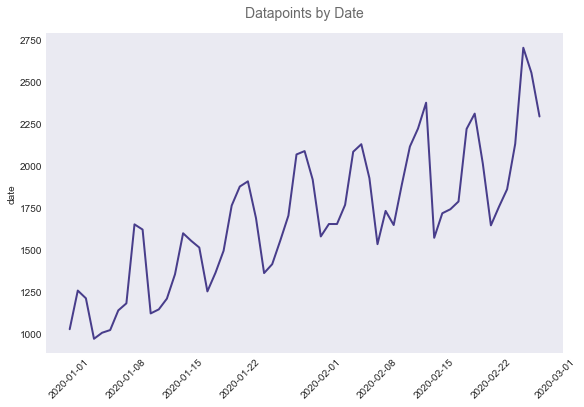

In [87]:
fig = plt.figure(constrained_layout=True, figsize=(8, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])


# Lineplot - Evolution of e-commerce orders along time 
sns.lineplot(data=df['date'].value_counts().sort_index(), ax=ax1, 
             color='darkslateblue', linewidth=2)

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Datapoints by Date', y = 1.03, size=14, color='dimgrey');

In [88]:
portugal = df[df.country == 'Portugal']
ghana = df[df.country == 'Ghana']

### Evolution of orders
Answer: Generally, orders tend to fluctuate a lot throughout the month, displaying a u-shaped pattern in terms of the number of orders. Orders also seem to peak towards the end of the month in both Portugal and Ghana, with the pace of orders picking up in the middle of the month. As far as the days are concerned, it seems like more orders are placed in the first half of the week. Mon and Tues are most popular days to order food in Portugal, while in Ghana, Tuesday-Wednesday are the most popular days to order food!

2020-02-26    2334
2020-02-27    2228
2020-02-14    2134
2020-02-28    2053
2020-02-20    1943
Name: date, dtype: int64

2020-02-26    368
2020-02-20    367
2020-02-17    337
2020-02-27    325
2020-02-18    324
Name: date, dtype: int64


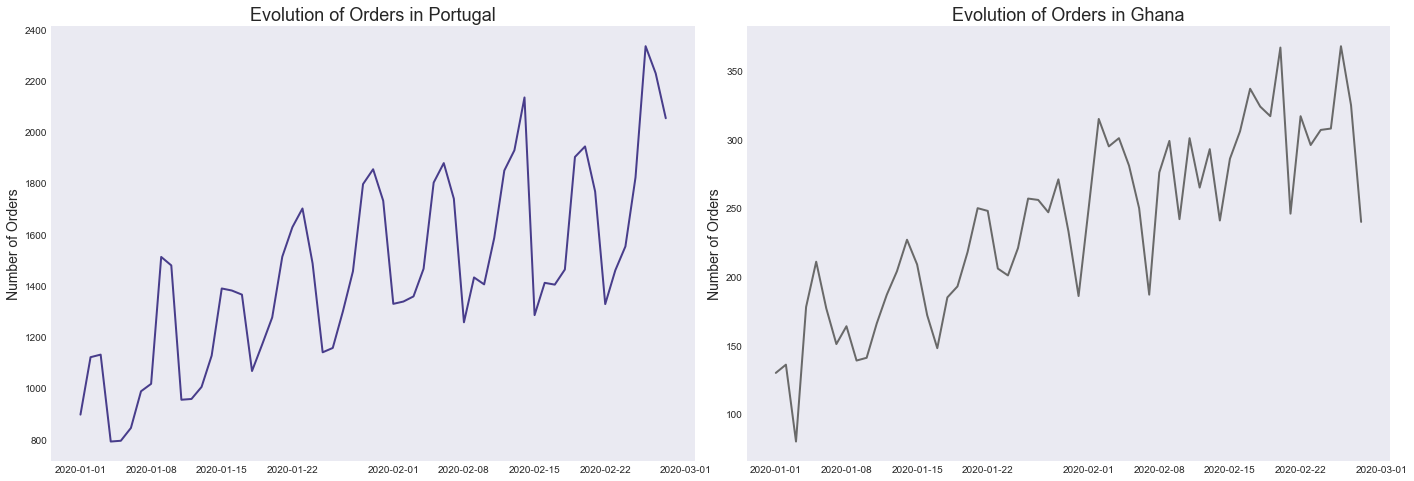

In [89]:
fig, ax = plt.subplots(1,2,figsize=(24, 8),sharey=False) 
plt.subplots_adjust(wspace=0.08)

print(portugal['date'].value_counts().sort_values(ascending=False).head(5))
print()
print(ghana['date'].value_counts().sort_values(ascending=False).head(5))

sns.lineplot(data=portugal['date'].value_counts().sort_index(), ax=ax[0], 
             color='darkslateblue', linewidth=2, markers=['o'])
ax[0].set_title('Evolution of Orders in Portugal',fontsize=18)
ax[0].set_ylabel('Number of Orders', fontsize=14)

sns.lineplot(data=ghana['date'].value_counts().sort_index(), ax=ax[1], 
             color='dimgrey', linewidth=2)
ax[1].set_title('Evolution of Orders in Ghana',fontsize=18)
ax[1].set_ylabel('Number of Orders', fontsize=14);

In [90]:
df.columns

Index(['country', 'city', 'restaurantid', 'restaurantname', 'orderstate',
       'cancelreason', 'cuisine', 'platform', 'paymentmethod', 'cardissuer',
       'productsinorder', 'ordervaluegross', 'deliveryfee', 'deliverytime',
       'date', 'date_year', 'date_month', 'date_month_name', 'date_year_month',
       'date_day', 'date_dayofweek', 'date_dayofweek_name', 'gmv'],
      dtype='object')

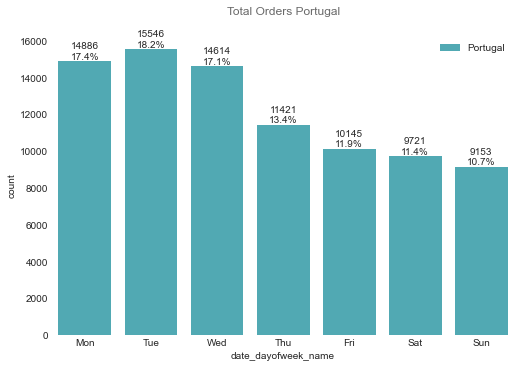

In [91]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(20, 5))

# Axis definition
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])


# Bar chart - Comparison between day of week ordersbetween Portugal and Ghana
viz_utils.single_countplot(portugal, x='date_dayofweek_name', hue='country', ax=ax1, order=False,
                 palette='YlGnBu')
month_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax1.set_xticklabels(month_label)
ax1.set_title('Total Orders Portugal', size=12, color='dimgrey', pad=20)
plt.legend(loc='upper right')
plt.show()

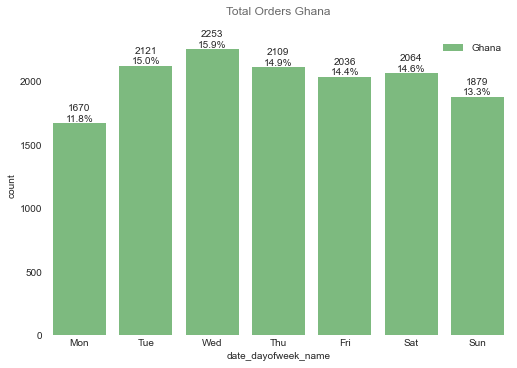

In [93]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(20, 5))

# Axis definition
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])


# Bar chart - Comparison between day of week ordersbetween Portugal and Ghana
viz_utils.single_countplot(ghana, x='date_dayofweek_name', hue='country', ax=ax1, order=False,
                 palette='Greens')
month_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax1.set_xticklabels(month_label)
ax1.set_title('Total Orders Ghana', size=12, color='dimgrey', pad=20)
plt.legend(loc='upper right')
plt.show()

## Order Status

Generally, both of these countries have high number of delivery items but Portugal it is worth pointing out that Ghana has higher number of failed and rejected orders!

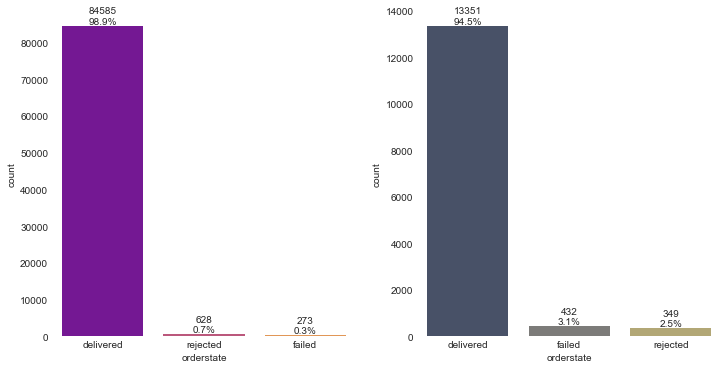

In [52]:
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(12, 6))
viz_utils.single_countplot(portugal, x='orderstate', ax = ax0)
viz_utils.single_countplot(ghana, x='orderstate', ax=ax1, palette = 'cividis')


### GMV Distribution

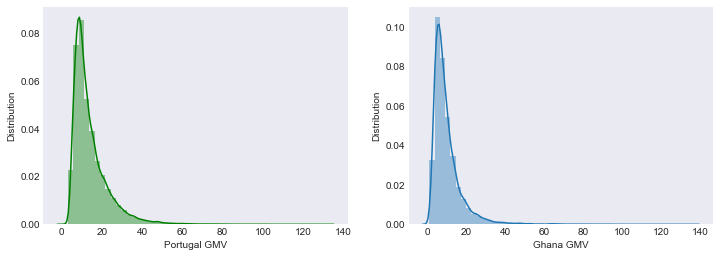

In [53]:
fig, (ax0,ax1) = plt.subplots(nrows = 1, ncols =2, sharey = False, figsize = (12,4))

sns.distplot(portugal['gmv'], ax = ax0, color='green')
ax0.set(xlabel = 'Portugal GMV', ylabel = 'Distribution')

sns.distplot(ghana['gmv'], ax = ax1)
ax1.set(xlabel = 'Ghana GMV', ylabel = 'Distribution');

### Products in Order Distribution

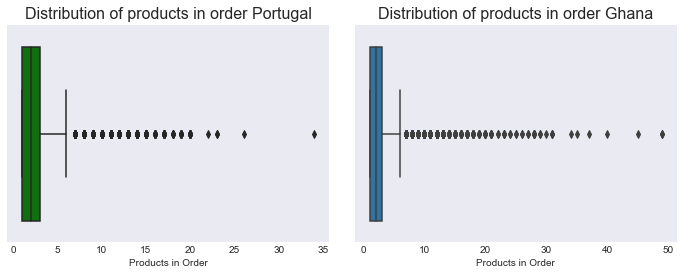

In [56]:
fig, ax = plt.subplots(1,2,figsize=(12, 4),sharey=False) 
plt.subplots_adjust(wspace=0.08)

# Deal Value over GMV (%)
sns.boxplot(x = 'productsinorder', data=portugal, ax=ax[0], color = 'green')
ax[0].set_title('Distribution of products in order Portugal',fontsize=16)
ax[0].set_xlabel('Products in Order')

# Deal Value (Eur)
sns.boxplot(x = 'productsinorder', data=ghana, ax=ax[1])
ax[1].set_title('Distribution of products in order Ghana',fontsize=16)
ax[1].set_xlabel('Products in Order');

### Restaurants and Cuisine Types

#### Portugal

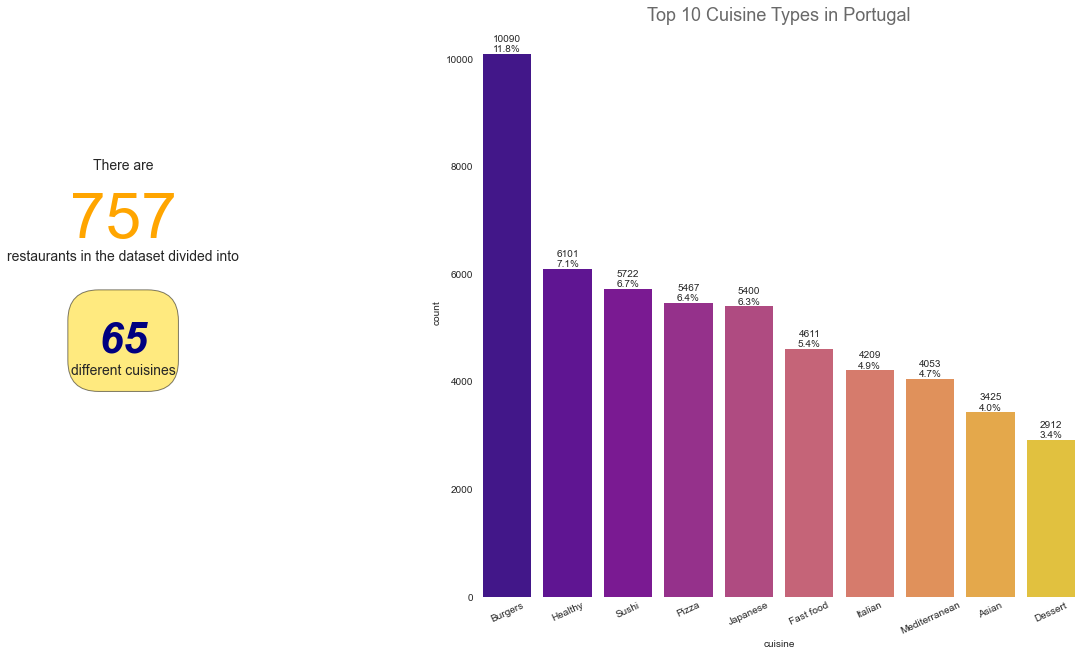

In [100]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(15, 9))

# Axis definition with GridSpec
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:3])

# Axis 1 - Big Number for total restaurants and total types in the data
total_restaurants = len(portugal['restaurantid'].value_counts())
total_types = len(portugal['cuisine'].value_counts())
ax1.text(0.00, 0.75, 'There are', fontsize=14, ha='center')
ax1.text(0.00, 0.63, f'{total_restaurants}', fontsize=64, color='orange', ha='center')
ax1.text(0, 0.59, 'restaurants in the dataset divided into', fontsize=14, ha='center')
ax1.text(0.00, 0.43, total_types, fontsize=44, ha='center', color='navy', style='italic', weight='bold',
         bbox=dict(facecolor='gold', alpha=0.5, pad=14, boxstyle='round, pad=.7'))
ax1.text(0, 0.39, 'different cuisines', fontsize=14, ha='center')
ax1.axis('off')

# Axis 2 - Total number of restaurants per type (Top N)
top = 10
viz_utils.single_countplot(portugal, ax2, x='cuisine', top=top)
ax2.set_title(f'Top {top} Cuisine Types in Portugal', color='dimgrey', size=18)
for tick in ax2.get_xticklabels():
    tick.set_rotation(25)

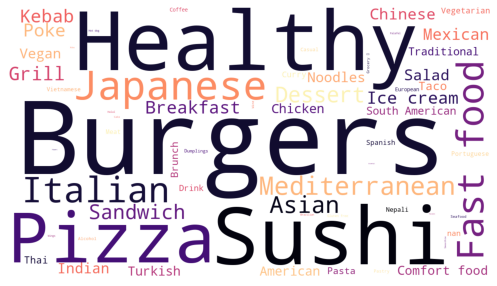

In [103]:
from collections import Counter
from wordcloud import WordCloud
# Creating a list with all options available
cuisines = list(portugal['cuisine'].astype(str).values)
cuisines_word_list = []
for lista in [c.split(',') for c in cuisines]:
    for word in lista:
        cuisines_word_list.append(word.strip())
        
# Creating a Counter for unique options and generating the wordcloud
cuisines_wc_dict = Counter(cuisines_word_list)

wordcloud = WordCloud(width=1280, height=720, collocations=False, random_state=42, 
                      colormap='magma', background_color='white').generate_from_frequencies(cuisines_wc_dict)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Ghana

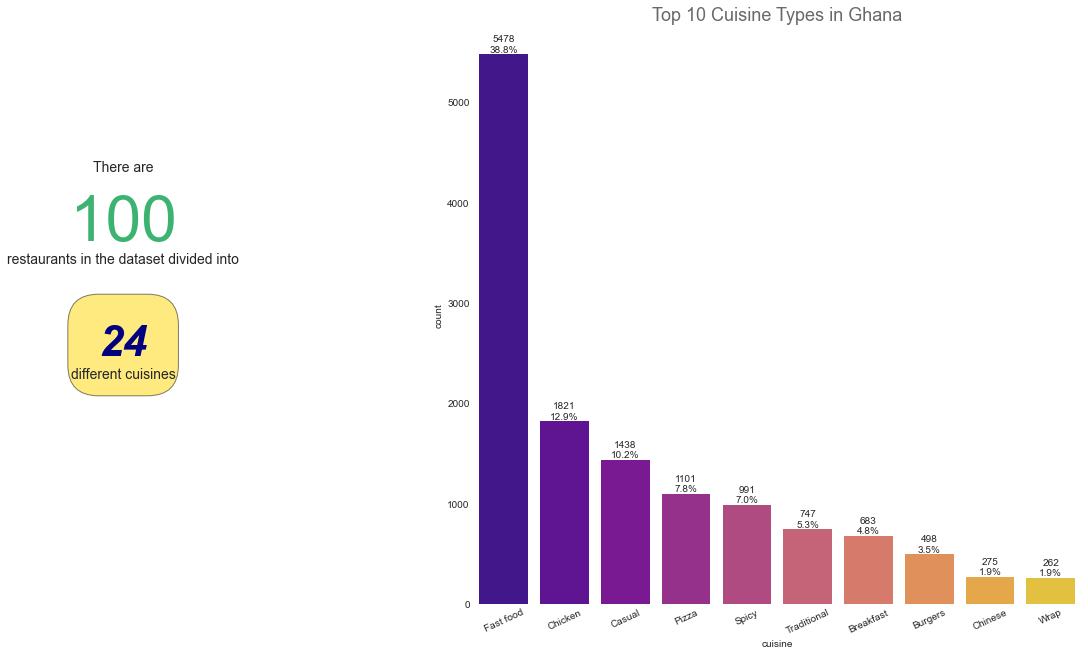

In [102]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(15, 9))

# Axis definition with GridSpec
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:3])

# Axis 1 - Big Number for total restaurants and total types in the data
total_restaurants = len(ghana['restaurantid'].value_counts())
total_types = len(ghana['cuisine'].value_counts())
ax1.text(0.00, 0.75, 'There are', fontsize=14, ha='center')
ax1.text(0.00, 0.63, f'{total_restaurants}', fontsize=64, color='mediumseagreen', ha='center')
ax1.text(0, 0.59, 'restaurants in the dataset divided into', fontsize=14, ha='center')
ax1.text(0.00, 0.43, total_types, fontsize=44, ha='center', color='navy', style='italic', weight='bold',
         bbox=dict(facecolor='gold', alpha=0.5, pad=14, boxstyle='round, pad=.7'))
ax1.text(0, 0.39, 'different cuisines', fontsize=14, ha='center')
ax1.axis('off')

# Axis 2 - Total number of restaurants per type (Top N)
top = 10
viz_utils.single_countplot(ghana, ax2, x='cuisine', top=top)
ax2.set_title(f'Top {top} Cuisine Types in Ghana', color='dimgrey', size=18)
for tick in ax2.get_xticklabels():
    tick.set_rotation(25)

### Platform Type

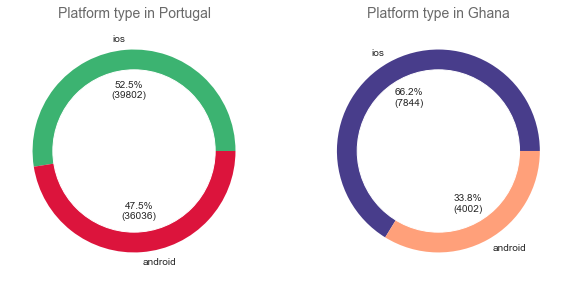

In [105]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
viz_utils.donut_plot(portugal, col='platform', colors=['mediumseagreen','crimson'], ax=axs[0], 
           title='Platform type in Portugal')
viz_utils.donut_plot(ghana, col='platform', colors=['darkslateblue', 'lightsalmon'], ax=axs[1], 
           title='Platform type in Ghana')

In [119]:
print(portugal[portugal['platform']=='ios'].orderstate.value_counts(normalize = True) * 100)
print()
print(portugal[portugal['platform']=='android'].orderstate.value_counts(normalize = True) * 100)

delivered    99.017637
rejected      0.688408
failed        0.293955
Name: orderstate, dtype: float64

delivered    98.906649
rejected      0.738151
failed        0.355200
Name: orderstate, dtype: float64


In [118]:
print(ghana[ghana['platform']=='ios'].orderstate.value_counts(normalize = True) * 100)
print()
print(ghana[ghana['platform']=='android'].orderstate.value_counts(normalize = True) * 100)

delivered    94.097399
failed        3.059663
rejected      2.842937
Name: orderstate, dtype: float64

delivered    94.827586
failed        3.298351
rejected      1.874063
Name: orderstate, dtype: float64


### Payment Method

There could be a marginal benefit in going cashless. As highlighted earlier, Ghana has more unsuccessful orders versus Portugal and the payment method may well contribute to this.
For example, we can see that Cashless payments have a 95% success rate in Ghana while Cash payments have a success rate of 92%.

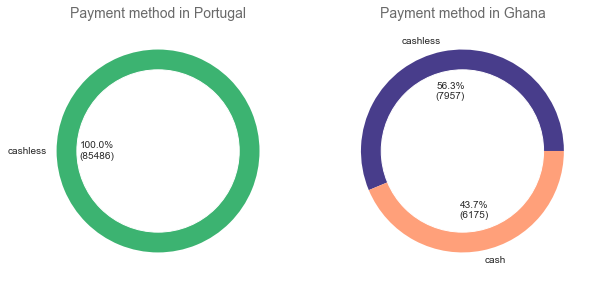

In [107]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
viz_utils.donut_plot(portugal, col='paymentmethod', colors=['mediumseagreen','crimson'], ax=axs[0], 
           title='Payment method in Portugal')
viz_utils.donut_plot(ghana, col='paymentmethod', colors=['darkslateblue', 'lightsalmon'], ax=axs[1], 
           title='Payment method in Ghana')

In [111]:
ghana[ghana['paymentmethod']=='cashless'].orderstate.value_counts(normalize = True) * 100 

delivered    95.714465
failed        2.375267
rejected      1.910268
Name: orderstate, dtype: float64

In [110]:
ghana[ghana['paymentmethod']=='cash'].orderstate.value_counts(normalize = True) * 100

delivered    92.874494
failed        3.935223
rejected      3.190283
Name: orderstate, dtype: float64

In [120]:
## New metric

mapping = {'delivered': "yes", "failed" : "no", "rejected": "no",
          }
portugal['is_successful'] = portugal['orderstate'].replace(mapping)
ghana['is_successful'] = ghana['orderstate'].replace(mapping)
df['is_successful'] = df['orderstate'].replace(mapping)

In [121]:
portugal_and_successful = df[ (df.country == 'Portugal') & (df.is_successful == 'yes')] 
portugal_and_unsuccessful = df[ (df.country == 'Portugal') & (df.is_successful == 'no')] 
ghana_and_successful = df[ (df.country == 'Ghana') & (df.is_successful == 'yes')] 
ghana_and_unsuccessful = df[ (df.country == 'Ghana') & (df.is_successful == 'no')] 

### Portugal

Choupana Caffe                          61
Burger King - Av. Roma                  53
Pão-me-Quer Caffe                       52
Nasty Burger                            30
Savage by Olivier                       22
Koi Sushi                               16
Mex Factory                             13
Subway - Saldanha                       13
Fruly                                   12
Oakberry Açaí Lisboa - Cais do Sodré    12
Name: restaurantname, dtype: int64


Text(0, 0.5, 'Names of Restaurants')

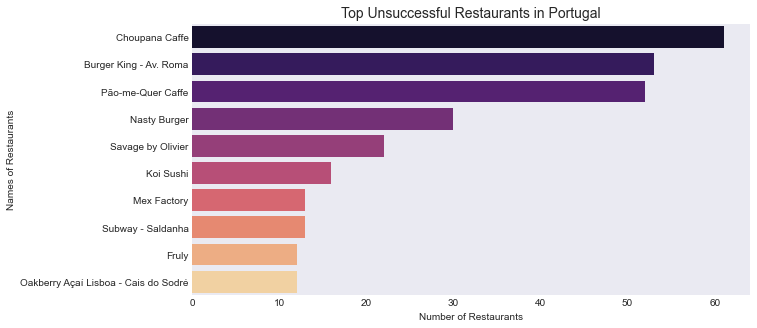

In [122]:
# Top Unsuccessful Restaurants in Portugal
print(portugal_and_unsuccessful['restaurantname'].value_counts()[:10])

plt.figure(figsize=(10,5))
top_restaurants = portugal_and_unsuccessful['restaurantname'].value_counts()[:10]
sns.barplot(x=top_restaurants, y=top_restaurants.index, palette='magma')
plt.title("Top Unsuccessful Restaurants in Portugal", size=14)
plt.xlabel("Number of Restaurants")
plt.ylabel("Names of Restaurants")

In [123]:
# bad restaurants portugal
#bad_res_portugal = portugal_and_unsuccessful[portugal_and_unsuccessful.restaurantname.isin(['Choupana Caffe','Burger King - Av. Roma','Pão-me-Quer Caffe','Nasty Burger'])].reset_index(drop=True)

In [136]:
# Most of the time it is the restaurant that rejected the order and not the customer
print(portugal_and_unsuccessful['cancelreason'].value_counts()[:10])
print()
# Evenly matched in terms of platform unsuccessful orders
print(portugal_and_unsuccessful['platform'].value_counts()[:10])

The restaurant rejected the order                          628
Could not find a courier to deliver the order              206
The restaurant asked customer support to fail the order     50
User cancellation                                           17
Name: cancelreason, dtype: int64

android    394
ios        391
Name: platform, dtype: int64


BANCO COMERCIAL PORTUGUES S.A.                      0.266292
CAIXA GERAL DE DEPOSITOS S.A.                       0.121348
BANCO SANTANDER TOTTA S.A.                          0.097753
NOVO BANCO S.A.                                     0.079775
CAIXA GERAL DE DEPOSITOS SA                         0.052809
CAIXABANK PAYMENTS & CONSUMER E.F.C. E.P. S.A.U.    0.047191
REVOLUT LTD                                         0.026966
REVOLUT PAYMENTS UAB                                0.025843
CAIXA ECONOMICA MONTEPIO GERAL                      0.023596
BANCO CTT S.A.                                      0.022472
Name: cardissuer, dtype: float64


Text(0, 0.5, 'Types of Items')

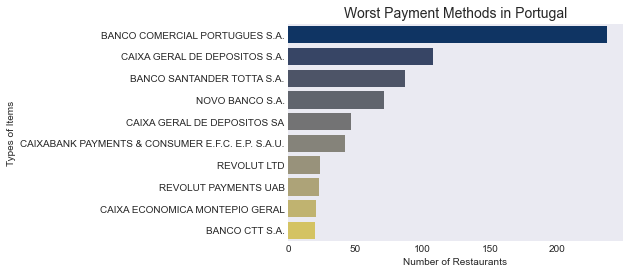

In [137]:
# Looking at order status!
print(portugal_and_unsuccessful['cardissuer'].value_counts(normalize=True)[:10])

worst_payments = portugal_and_unsuccessful['cardissuer'].value_counts()[:10]
sns.barplot(x=worst_payments, y=worst_payments.index, palette='cividis')
plt.title("Worst Payment Methods in Portugal", size=14)
plt.xlabel("Number of Restaurants")
plt.ylabel("Types of Items")

### Ghana

KFC North Industrial         47
KFC East Legon               46
KFC Marina Mall              44
KFC  Circle                  44
Zeallers Tasty Bites         32
FT - Tawakaltu Allah Lah     31
Urban Taste Restaurant       27
Galitos 37                   25
Yah Restaurant East Legon    22
Grab & Go Foods              22
Name: restaurantname, dtype: int64


Text(0, 0.5, 'Names of Restaurants')

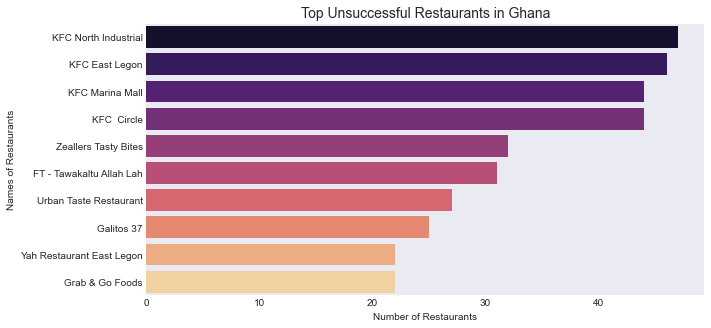

In [125]:
print(ghana_and_unsuccessful['restaurantname'].value_counts()[:10])
plt.figure(figsize=(10,5))
top_restaurants = ghana_and_unsuccessful['restaurantname'].value_counts()[:10]
sns.barplot(x=top_restaurants, y=top_restaurants.index, palette='magma')
plt.title("Top Unsuccessful Restaurants in Ghana", size=14)
plt.xlabel("Number of Restaurants")
plt.ylabel("Names of Restaurants")

In [126]:
#bad_res_ghana = ghana_and_unsuccessful[ghana_and_unsuccessful.restaurantname.isin(['KFC North Industrial','KFC East Legon','KFC Marina Mall','KFC  Circle','Zeallers Tasty Bites'])].reset_index(drop=True)

In [161]:
# Most of the time it is the restaurant that rejected the order and not the customer
print(ghana_and_unsuccessful['cancelreason'].value_counts(normalize = True)[:10])
print()
# Interestingly there are much more failed orders for IOs signalling there could be a bug with the system and with 70% of failed orders coming from IOS - worth pointing out more
# ios users in Ghana anyway but still should deep dive
print(ghana_and_unsuccessful['platform'].value_counts(normalize = True)[:10] * 100)

The restaurant rejected the order                          0.446863
The restaurant asked customer support to fail the order    0.321383
Could not find a courier to deliver the order              0.186940
User cancellation                                          0.044814
Name: cancelreason, dtype: float64

ios        69.104478
android    30.895522
Name: platform, dtype: float64


In [162]:
print(ghana_and_unsuccessful['platform'].value_counts(normalize = True)[:10] * 100)

ios        69.104478
android    30.895522
Name: platform, dtype: float64


In [141]:
ghana.platform.value_counts()

ios        7844
android    4002
Name: platform, dtype: int64

In [154]:
df.groupby(by=['date_month_name','country'], as_index=False).size()

,date_month_name,country,size
0,Feb,Ghana,8140
1,Feb,Portugal,46454
2,Jan,Ghana,5992
3,Jan,Portugal,39032


(14132, 24)

In [ ]:
# Grouping by Date and Regions and looking at order count along with GMV
df_regions_group = df.groupby(by=['date_month_name','country'], as_index=False).size()
df_regions_group = df_regions_group.agg({'restaurantid': 'count', 'gmv':'sum'})
df_regions_group.columns = ['month','region','order_count','gmv_total']
df_regions_group.reset_index(drop=True, inplace=True)
df_regions_group.head()

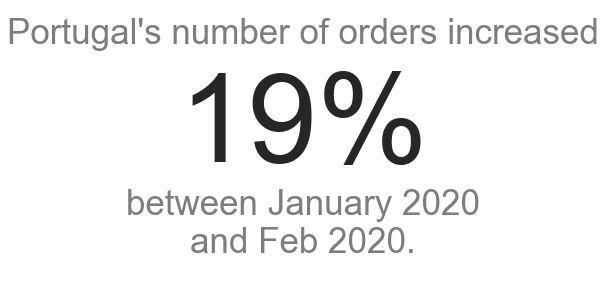

In [157]:
pct_change = round((46454/39032 - 1) * 100,2)
pct_change

# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create text:
plt.text(x = 0.5,                              # at horizontal = 0.5
         y = 0.9,                              # at vertical = 0.9
         s = 'Portugal\'s number of orders increased', # content of text (string)
         ha = 'center',                        # center-aligned horizontally
         va = 'center',                        # center-aligned vertically
         size = 35,                            # font size = 35
         alpha = 0.6)                          # alpha = 0.6 --> 60% opaque; 40% clear


# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 125
# alpha = 1 --> totally opaque

plt.text(x = 0.5,
         y = 0.55,
         s = str(round(pct_change)) + '%',
         ha = 'center',
         va = 'center',
         size = 125,
         alpha = 1)


plt.text(x = 0.5,
         y = 0.2,
         s = 'between January 2020\nand Feb 2020.',
         ha = 'center',
         va = 'center',
         size = 35,
         alpha = 0.6)

# No axes.
plt.axis('off');

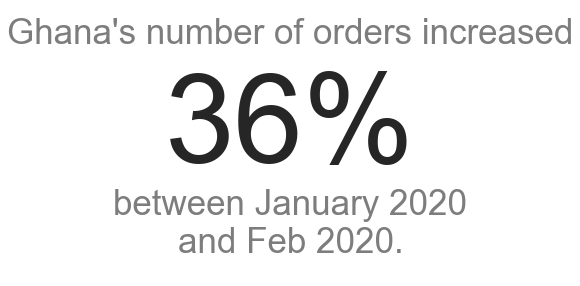

In [158]:
pct_change = round((8140/5992 - 1) * 100,2)
pct_change

# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create text:
plt.text(x = 0.5,                              # at horizontal = 0.5
         y = 0.9,                              # at vertical = 0.9
         s = 'Ghana\'s number of orders increased', # content of text (string)
         ha = 'center',                        # center-aligned horizontally
         va = 'center',                        # center-aligned vertically
         size = 35,                            # font size = 35
         alpha = 0.6)                          # alpha = 0.6 --> 60% opaque; 40% clear


# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 125
# alpha = 1 --> totally opaque

plt.text(x = 0.5,
         y = 0.55,
         s = str(round(pct_change)) + '%',
         ha = 'center',
         va = 'center',
         size = 125,
         alpha = 1)


plt.text(x = 0.5,
         y = 0.2,
         s = 'between January 2020\nand Feb 2020.',
         ha = 'center',
         va = 'center',
         size = 35,
         alpha = 0.6)

# No axes.
plt.axis('off');

In [159]:
print("MoM increase in orders in Portugal: ",round((46454/39032 - 1) * 100,2), "percent")
print("MoM increase in orders in Ghana: ",round((8140/5992 - 1) * 100,2), "percent")
print()
print("Expected orders in Portugal in March: ",round((46454 * 1.1902)), "orders")
print("Expected orders in Ghana in March: ",round((8140 * 1.3585)), "orders")

MoM increase in orders in Portugal:  19.02 percent
MoM increase in orders in Ghana:  35.85 percent

Expected orders in Portugal in March:  55290 orders
Expected orders in Ghana in March:  11058 orders


In [172]:
pip install --upgrade nbconvert

     |████████████████████████████████| 561 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 13.5 MB/s eta 0:00:01
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 6.1.0
    Uninstalling nbconvert-6.1.0:
      Successfully uninstalled nbconvert-6.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
cookiec

In [166]:
pip install pyppeteer

Note: you may need to restart the kernel to use updated packages.
